#### **Vaidehi Vatsaraj**
#### **2018130060**

### Data Science, 2022
#### Tut 1: Exploratory Data Analysis


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Problem 1:
Perform EDA such as number of data samples, number of features, number of classes, number of data samples per class, removing missing values, conversion to numbers, using seaborn library to plot different graphs.

# Dataset Input

Columns in dataset:

YEAR

1.   STATE
2.   AGENCY
3. UNIT_ID
4. FIRE_NAME
5. INC_NUM (incident number)
6. ALARM_DATE
7. CONT_DATE (containment date)
8. CAUSE
9. COMMENTS
10. REPORT_AC (reported number of acres burned)
11. GIS_ACRES (number of acres burned as determined by analysis of GIS data)
12. C_METHOD
13. OBJECTIVE

In [ ]:
wildfire_data_2016 = pd.read_excel('./Wildfire.xlsx', sheet_name='2016')
wildfire_data_2016.head()

,YEAR,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE
0,1878,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,59468.8800,<Null>,Suppression (Wildfire)
1,1895,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,628.1136,<Null>,Suppression (Wildfire)
2,1896,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,7531.7170,<Null>,Suppression (Wildfire)
3,1898,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,1660.1030,<Null>,Suppression (Wildfire)
4,1898,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,428.4387,<Null>,Suppression (Wildfire)


Number of Data Samples

In [ ]:
print("Number of data samples at the beginning: ", len(wildfire_data_2016))

Number of data samples at the beginning:  11795


Number of features

In [ ]:
print("Number of features at the beginning: ", len(wildfire_data_2016.columns))

Number of features at the beginning:  14


Number of Classes

Number of Data Samples per Class

In [ ]:
wildfire_data_2016['OBJECTIVE'].value_counts()

Suppression (Wildfire)    11575
Resource Benefit (WFU)      164
<Null>                       56
Name: OBJECTIVE, dtype: int64

# Data Cleaning

From the above outputs of head() and info() we can see that even though the <'Null'> values are present in the columns ALARM_DATE and CONT_DATE in the head() output, those values are treated as non-null in the output of info().

Pandas can handle missing data, but  <'Null'> is a non-standard representation for missing data. Hence Pandas interprets it as the non-null character string "<'Null'>".

To solve this problem, we can use an option in pd.read_excel function to specify additional data as null values.

### Specifying additional data as null values

In [ ]:
wildfire_data_2016 = pd.read_excel('/content/drive/MyDrive/DS-Lab/Tutorial/Tut1/Wildfire.xlsx', sheet_name='2016', na_values=['<Null>'])
wildfire_data_2016.head()

,YEAR,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE
0,1878.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,59468.8800,NaN,Suppression (Wildfire)
1,1895.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,628.1136,NaN,Suppression (Wildfire)
2,1896.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,7531.7170,NaN,Suppression (Wildfire)
3,1898.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,1660.1030,NaN,Suppression (Wildfire)
4,1898.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,428.4387,NaN,Suppression (Wildfire)


For datetime64[ns] types, NaT represents missing values. This is a pseudo-native sentinel value that can be represented by NumPy in a singular dtype (datetime64[ns]).

ALARM_DATE is interpreted as an "object" (read: string), and CONT_DATE is interpreted as a date (datetype64[ns]). 

The reason for this discrepancy appears to be the fact that two of the ALARM_DATEs occurred before 1900, and pandas does not correctly interpret them as dates, leaving them as strings. 
It would be good if they were both interpreted as dates so that we could operate on them as such. We can use the pd.to_datetime function, either after we have read the dataframe in, or during the reading process itself by explicitly assigning a converter to each of the data fields.

In [ ]:
wildfire_data_2016 = pd.read_excel('/content/drive/MyDrive/DS-Lab/Tutorial/Tut1/Wildfire.xlsx', sheet_name='2016', na_values=['<Null>'], converters={'ALARM_DATE': pd.to_datetime, 'CONT_DATE': pd.to_datetime})
wildfire_data_2016.head()

,YEAR,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE
0,1878.0,California,Contract County,Los Angeles County,,0,NaT,NaT,14 - Unknown / Unidentified,NaN,NaN,59468.8800,NaN,Suppression (Wildfire)
1,1895.0,California,Contract County,Los Angeles County,,0,NaT,NaT,14 - Unknown / Unidentified,NaN,NaN,628.1136,NaN,Suppression (Wildfire)
2,1896.0,California,Contract County,Los Angeles County,,0,NaT,NaT,14 - Unknown / Unidentified,NaN,NaN,7531.7170,NaN,Suppression (Wildfire)
3,1898.0,California,Contract County,Los Angeles County,,0,NaT,NaT,14 - Unknown / Unidentified,NaN,NaN,1660.1030,NaN,Suppression (Wildfire)
4,1898.0,California,Contract County,Los Angeles County,,0,NaT,NaT,14 - Unknown / Unidentified,NaN,NaN,428.4387,NaN,Suppression (Wildfire)


### Concatenating Datasets

In [ ]:
wildfire_data_2017 = pd.read_excel('/content/drive/MyDrive/DS-Lab/Tutorial/Tut1/Wildfire.xlsx', sheet_name='2017', na_values=['<Null>'], converters= {'ALARM_DATE': pd.to_datetime, 'CONT_DATE': pd.to_datetime})
wildfire_data_2017.head()

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE
0,2017,California,California Department of Forestry and Fire Pro...,Tulare County,DINELY,286,2017-06-07,2017-06-11,2 - Equipment Use,NaN,339.0,340.5638,1 - GPS Ground,Suppression (Wildfire)
1,2017,California,California Department of Forestry and Fire Pro...,Tulare County,ROADRUNNER,441,2017-07-30,2017-08-01,7 - Arson,NaN,2289.0,2284.5960,1 - GPS Ground,Suppression (Wildfire)
2,2017,California,California Department of Forestry and Fire Pro...,Tulare County,ELEPHANT 2,420,2017-07-20,2017-07-22,7 - Arson,NaN,416.0,415.2116,1 - GPS Ground,Suppression (Wildfire)
3,2017,California,California Department of Forestry and Fire Pro...,Tehama - Glenn CAL FIRE,TEHAMA,10345,2017-10-30,2017-10-31,10 - Vehicle,NaN,194.0,194.0017,1 - GPS Ground,Suppression (Wildfire)
4,2017,California,California Department of Forestry and Fire Pro...,Tuolumne - Calaveras CAL FIRE,JACKSONVILLE,9024,2017-07-29,2017-07-30,14 - Unknown / Unidentified,NaN,NaN,684.3565,1 - GPS Ground,Suppression (Wildfire)


In [ ]:
print(wildfire_data_2016.columns)

Index(['YEAR', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME', 'INC_NUM',
       'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'COMMENTS', 'REPORT_AC',
       'GIS_ACRES', 'C_METHOD', 'OBJECTIVE'],
      dtype='object')


In [ ]:
print(wildfire_data_2017.columns)

Index(['YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME', 'INC_NUM',
       'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'COMMENTS', 'REPORT_AC',
       'GIS_ACRES', 'C_METHOD', 'OBJECTIVE'],
      dtype='object')


Renaming the first column in df of 2017 from YEAR_ to YEAR

In [ ]:
wildfire_data_2017.rename(columns={'YEAR_': 'YEAR'}, inplace=True)
print(wildfire_data_2017.columns)

Index(['YEAR', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME', 'INC_NUM',
       'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'COMMENTS', 'REPORT_AC',
       'GIS_ACRES', 'C_METHOD', 'OBJECTIVE'],
      dtype='object')


Concatenating 2 dataframes

In [ ]:
wildfire_data = pd.concat((wildfire_data_2016, wildfire_data_2017), axis=0)
wildfire_data.head()

,YEAR,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE
0,1878.0,California,Contract County,Los Angeles County,,0,NaT,NaT,14 - Unknown / Unidentified,NaN,NaN,59468.8800,NaN,Suppression (Wildfire)
1,1895.0,California,Contract County,Los Angeles County,,0,NaT,NaT,14 - Unknown / Unidentified,NaN,NaN,628.1136,NaN,Suppression (Wildfire)
2,1896.0,California,Contract County,Los Angeles County,,0,NaT,NaT,14 - Unknown / Unidentified,NaN,NaN,7531.7170,NaN,Suppression (Wildfire)
3,1898.0,California,Contract County,Los Angeles County,,0,NaT,NaT,14 - Unknown / Unidentified,NaN,NaN,1660.1030,NaN,Suppression (Wildfire)
4,1898.0,California,Contract County,Los Angeles County,,0,NaT,NaT,14 - Unknown / Unidentified,NaN,NaN,428.4387,NaN,Suppression (Wildfire)


Addign new column duration that represents the duration between Alarm Date and Contentment Date

In [ ]:
wildfire_data['DURATION'] = (wildfire_data['CONT_DATE'] - wildfire_data['ALARM_DATE']).dt.days
wildfire_data.head()

,YEAR,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,DURATION
0,1878.0,California,Contract County,Los Angeles County,,0,NaT,NaT,14 - Unknown / Unidentified,NaN,NaN,59468.8800,NaN,Suppression (Wildfire),NaN
1,1895.0,California,Contract County,Los Angeles County,,0,NaT,NaT,14 - Unknown / Unidentified,NaN,NaN,628.1136,NaN,Suppression (Wildfire),NaN
2,1896.0,California,Contract County,Los Angeles County,,0,NaT,NaT,14 - Unknown / Unidentified,NaN,NaN,7531.7170,NaN,Suppression (Wildfire),NaN
3,1898.0,California,Contract County,Los Angeles County,,0,NaT,NaT,14 - Unknown / Unidentified,NaN,NaN,1660.1030,NaN,Suppression (Wildfire),NaN
4,1898.0,California,Contract County,Los Angeles County,,0,NaT,NaT,14 - Unknown / Unidentified,NaN,NaN,428.4387,NaN,Suppression (Wildfire),NaN


The minimum value of duration is -32862.000 days even though the contentment date should be later than the alarm date.

In [ ]:
wildfire_data[wildfire_data.DURATION < 0]

,YEAR,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,DURATION
6728,1978.0,California,USDA Forest Service,Stanislaus National Forest,KIBBIE,NaN,1979-08-08,1978-11-10,1 - Lightning,20090305,192.000000,227.8784,6 - Hand Drawn,Suppression (Wildfire),-271.0
8159,1987.0,California,National Park Service,Sequoia - Kings Canyon NP,COFFEE,0,1987-09-29,1987-09-10,1 - Lightning,NaN,240.000000,196.1928,8 - Unknown,Suppression (Wildfire),-19.0
9138,1996.0,California,California Department of Forestry and Fire Pro...,Nevada - Yuba - Placer CAL FIRE,COLUMBIA HILL,0,1996-10-21,1996-10-20,5 - Debris,NaN,NaN,1517.4430,NaN,Suppression (Wildfire),-1.0
10375,2005.0,California,Contract County,Los Angeles County,SIERRA,149034,2005-07-13,2005-04-14,8 - Playing with fire,NaN,364.000000,364.3786,8 - Unknown,Suppression (Wildfire),-90.0
10618,2007.0,California,Bureau of Land Management,Bakersfield District - BLM (old),BROWN,1504,2007-07-20,2007-06-23,9 - Miscellaneous,,84.700000,1430.3170,1 - GPS Ground,Suppression (Wildfire),-27.0
11511,2014.0,California,National Park Service,Yosemite National Park,DARK HOLE,57,2015-07-16,2014-09-27,1 - Lightning,Managed Lightning Ignited,1076.479248,1076.4790,1 - GPS Ground,NaN,-292.0
11559,2015.0,California,USDA Forest Service,Humbolt-Toiyabe National Forest,WASHINGTON,30251,2015-07-19,2015-01-01,1 - Lightning,,NaN,17779.5400,3 - Infrared,Suppression (Wildfire),-199.0
11639,2016.0,California,California Department of Forestry and Fire Pro...,Tuolumne - Calaveras CAL FIRE,MARSHES,10403,2106-09-26,2016-10-05,10 - Vehicle,NaN,1080.000000,930.5065,3 - Infrared,Suppression (Wildfire),-32862.0
126,2017.0,California,USDA Forest Service,Plumas National Forest,SQUIRREL,1273,2017-09-27,2017-08-29,7 - Arson,NaN,350.000000,113.0544,6 - Hand Drawn,Suppression (Wildfire),-29.0


Removing entries with duration less than 0 days and greater than 3000 days as both situations do not make sense

In [ ]:
wildfire_data = wildfire_data[(wildfire_data.DURATION >= 0) & (wildfire_data.DURATION < 3000)]
wildfire_data

,YEAR,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,DURATION
1214,1921.0,California,USDA Forest Service,Eldorado National Forest,PENNSYLVANIA,0,1921-10-04,1921-10-04,9 - Miscellaneous,Containment 'fire_day' estimated,NaN,273.4315,NaN,Suppression (Wildfire),0.0
1251,1921.0,California,National Park Service,Sequoia - Kings Canyon NP,ELK CREEK,0,1921-07-05,1921-07-17,4 - Campfire,NaN,1600.0,1551.4670,8 - Unknown,Suppression (Wildfire),12.0
1340,1922.0,California,National Park Service,Sequoia - Kings Canyon NP,PANTHER,0,1922-09-19,1922-09-23,1 - Lightning,NaN,350.0,535.8748,8 - Unknown,Suppression (Wildfire),4.0
1341,1922.0,California,National Park Service,Sequoia - Kings Canyon NP,HOSPITAL,0,1922-08-13,1922-08-17,4 - Campfire,NaN,550.0,667.1011,8 - Unknown,Suppression (Wildfire),4.0
1342,1922.0,California,National Park Service,Sequoia - Kings Canyon NP,E.FORK,0,1922-07-04,1922-07-06,4 - Campfire,NaN,300.0,449.5453,8 - Unknown,Suppression (Wildfire),2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2017.0,California,National Park Service,Yosemite National Park,SOUTH FORK,108,2017-08-13,2017-11-03,1 - Lightning,no new growth past 10/11,7000.0,7560.0770,8 - Unknown,Suppression (Wildfire),82.0
178,2017.0,California,California Department of Forestry and Fire Pro...,Sonoma - Lake - Napa CAL FIRE,REDWOOD VALLEY,12172,2017-10-08,2017-10-25,14 - Unknown / Unidentified,Mendocino Lake Complex,NaN,36522.9500,8 - Unknown,Suppression (Wildfire),17.0
179,2017.0,California,USDA Forest Service,Rouge River- Siskiyou,ABNEY,568,2017-08-10,2018-01-10,1 - Lightning,"Miller Complex, cause from Incinet, Cont Date ...",NaN,32893.2600,8 - Unknown,Suppression (Wildfire),153.0
180,2017.0,California,USDA Forest Service,Rouge River- Siskiyou,KNOX,612,2017-08-11,2017-11-28,1 - Lightning,"Miller Complex, cause from Incinet, Cont Date ...",NaN,492.5997,8 - Unknown,Suppression (Wildfire),109.0


Selecting required columns

Removing columns ALARM_DATE and CONT_DATE because we have created a new column duration and hence we don't need them anymore

In [ ]:
wildfire_data = wildfire_data.drop(columns=['INC_NUM', 'COMMENTS', 'ALARM_DATE', 'CONT_DATE', 'FIRE_NAME'])
wildfire_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3140 entries, 1214 to 181
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YEAR       3140 non-null   float64
 1   STATE      3140 non-null   object 
 2   AGENCY     3140 non-null   object 
 3   UNIT_ID    3137 non-null   object 
 4   CAUSE      3137 non-null   object 
 5   REPORT_AC  2999 non-null   float64
 6   GIS_ACRES  3140 non-null   float64
 7   C_METHOD   3092 non-null   object 
 8   OBJECTIVE  3115 non-null   object 
 9   DURATION   3140 non-null   float64
dtypes: float64(4), object(6)
memory usage: 269.8+ KB


### Handling Missing Values

In [ ]:
# count of null values in each column
print(wildfire_data.isnull().sum())

YEAR           0
STATE          0
AGENCY         0
UNIT_ID        3
CAUSE          3
REPORT_AC    141
GIS_ACRES      0
C_METHOD      48
OBJECTIVE     25
DURATION       0
dtype: int64


In [ ]:
# count of null values in each column
print(wildfire_data.isnull().sum())

YEAR           0
STATE          0
AGENCY         0
UNIT_ID        3
CAUSE          3
REPORT_AC    141
GIS_ACRES      0
C_METHOD      48
OBJECTIVE     25
DURATION       0
dtype: int64


In [ ]:
wildfire_data = wildfire_data.dropna(axis = 0, how ='any') 

In [ ]:
# count of null values in each column
print(wildfire_data.isnull().sum())

YEAR         0
STATE        0
AGENCY       0
UNIT_ID      0
CAUSE        0
REPORT_AC    0
GIS_ACRES    0
C_METHOD     0
OBJECTIVE    0
DURATION     0
dtype: int64


In [ ]:
wildfire_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2939 entries, 1251 to 177
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YEAR       2939 non-null   float64
 1   STATE      2939 non-null   object 
 2   AGENCY     2939 non-null   object 
 3   UNIT_ID    2939 non-null   object 
 4   CAUSE      2939 non-null   object 
 5   REPORT_AC  2939 non-null   float64
 6   GIS_ACRES  2939 non-null   float64
 7   C_METHOD   2939 non-null   object 
 8   OBJECTIVE  2939 non-null   object 
 9   DURATION   2939 non-null   float64
dtypes: float64(4), object(6)
memory usage: 252.6+ KB


In [ ]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = []
categorical_columns = []
features = wildfire_data.columns.values.tolist()
for col in features:
    if wildfire_data[col].dtype in numerics:
        numerical_columns.append(col)
    else:
        categorical_columns.append(col)
print("Numerical Columns: ", numerical_columns)

print("\nCategorical Columns: ", categorical_columns)

Numerical Columns:  ['YEAR', 'REPORT_AC', 'GIS_ACRES', 'DURATION']

Categorical Columns:  ['STATE', 'AGENCY', 'UNIT_ID', 'CAUSE', 'C_METHOD', 'OBJECTIVE']


# Handling Outliers

Text(0, 0.5, 'P(YEAR)')

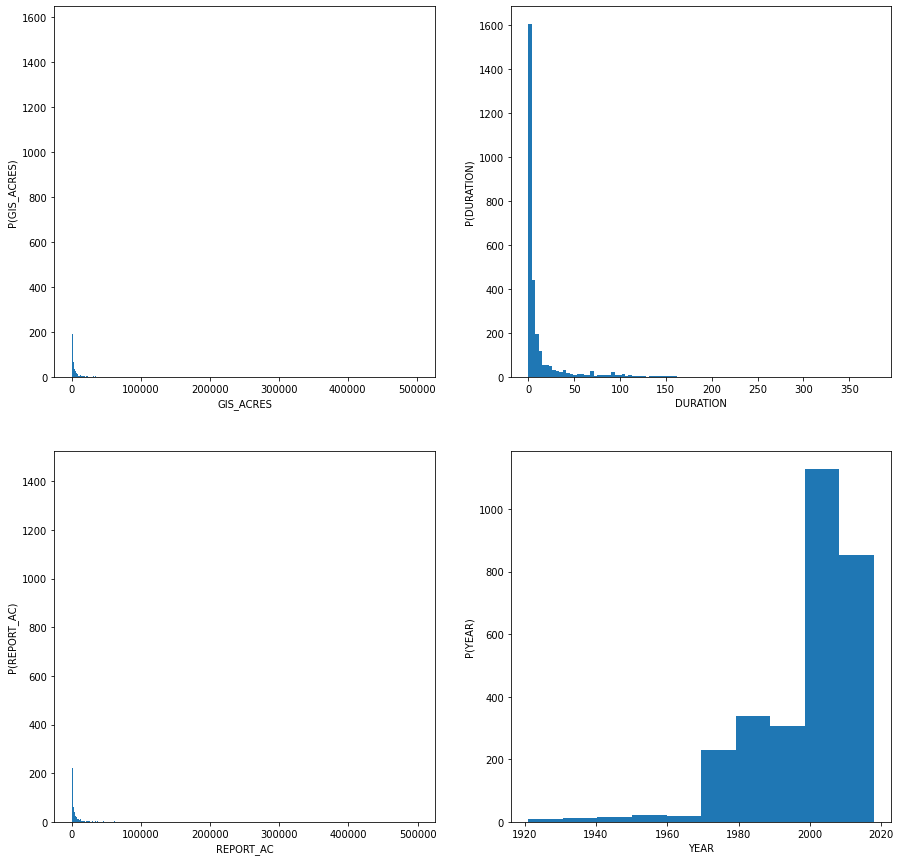

In [ ]:
plt.figure(figsize=[15,15])
plt.subplot(2,2,1)
plt.hist(wildfire_data.GIS_ACRES, bins=1000)
plt.xlabel('GIS_ACRES'); plt.ylabel('P(GIS_ACRES)')

plt.subplot(2,2,2)
plt.hist(wildfire_data.DURATION, bins=100)
plt.xlabel('DURATION'); plt.ylabel('P(DURATION)')

plt.subplot(2,2,3)
plt.hist(wildfire_data.REPORT_AC, bins=1000)
plt.xlabel('REPORT_AC'); plt.ylabel('P(REPORT_AC)')

plt.subplot(2,2,4)
plt.hist(wildfire_data.YEAR, bins=10)
plt.xlabel('YEAR'); plt.ylabel('P(YEAR)')

Text(0, 0.5, 'P(YEAR)')

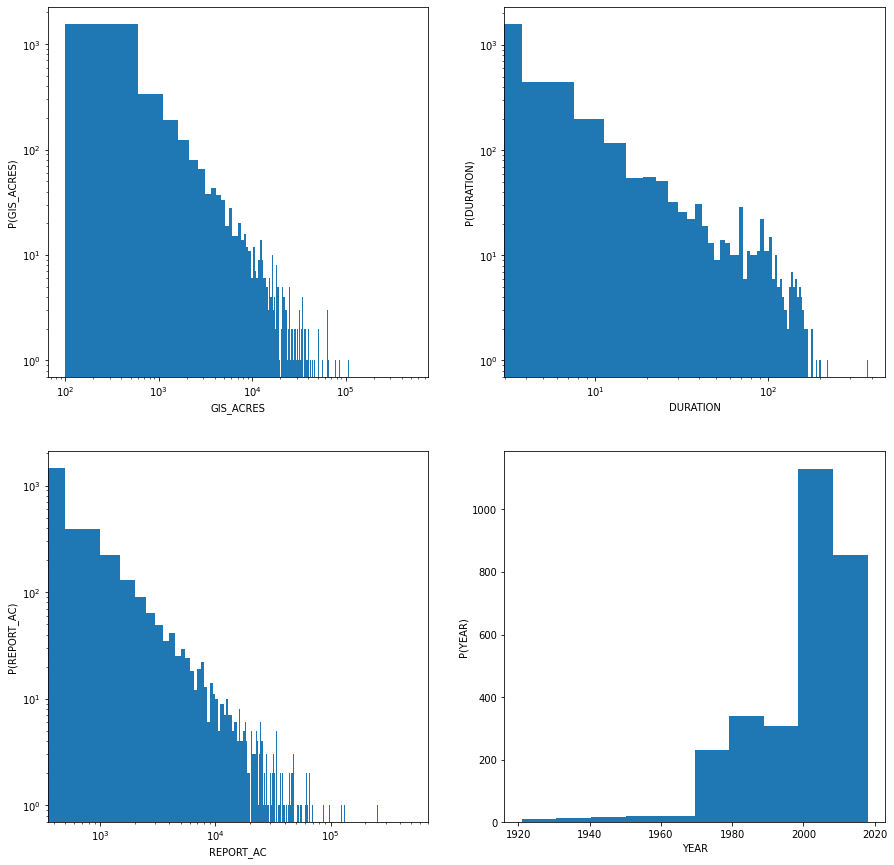

In [ ]:
plt.figure(figsize=[15,15])
plt.subplot(2,2,1)
plt.hist(wildfire_data.GIS_ACRES, bins=1000)
plt.loglog()
plt.xlabel('GIS_ACRES'); plt.ylabel('P(GIS_ACRES)')

plt.subplot(2,2,2)
plt.hist(wildfire_data.DURATION, bins=100)
plt.loglog()
plt.xlabel('DURATION'); plt.ylabel('P(DURATION)')

plt.subplot(2,2,3)
plt.hist(wildfire_data.REPORT_AC, bins=1000)
plt.loglog()
plt.xlabel('REPORT_AC'); plt.ylabel('P(REPORT_AC)')

plt.subplot(2,2,4)
plt.hist(wildfire_data.YEAR, bins=10)
plt.xlabel('YEAR'); plt.ylabel('P(YEAR)')

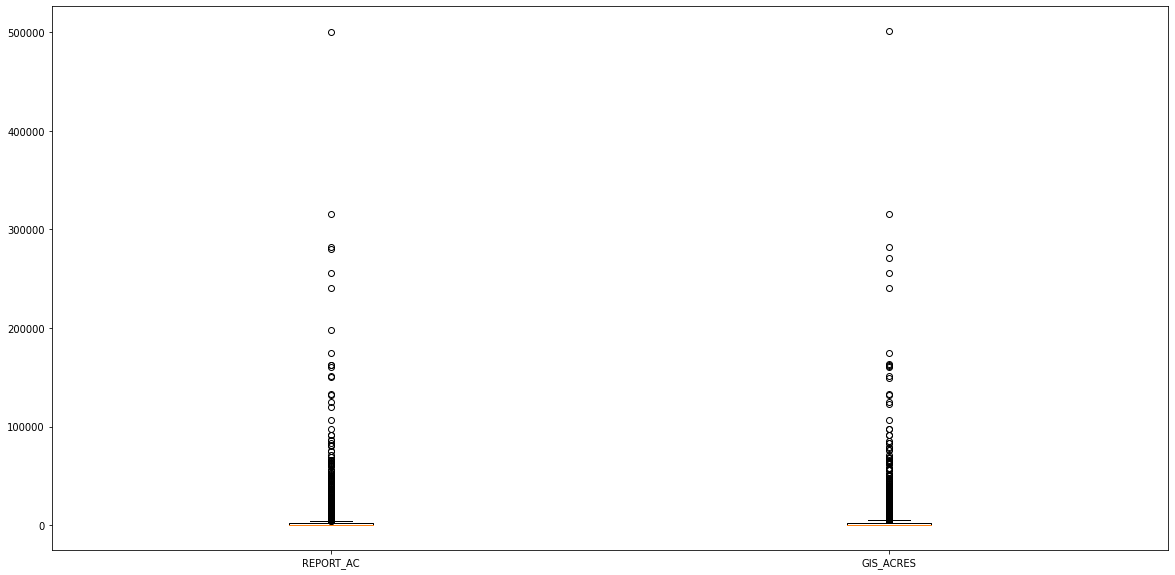

In [ ]:
plt.figure(figsize=(20,10))
plt.boxplot([vals.dropna() for col, vals in wildfire_data[['REPORT_AC', 'GIS_ACRES']].iteritems()]);
plt.xticks([1,2], ['REPORT_AC', 'GIS_ACRES']);

Removing entries with REPORT_AC and GIS_ACRES greater than 300000

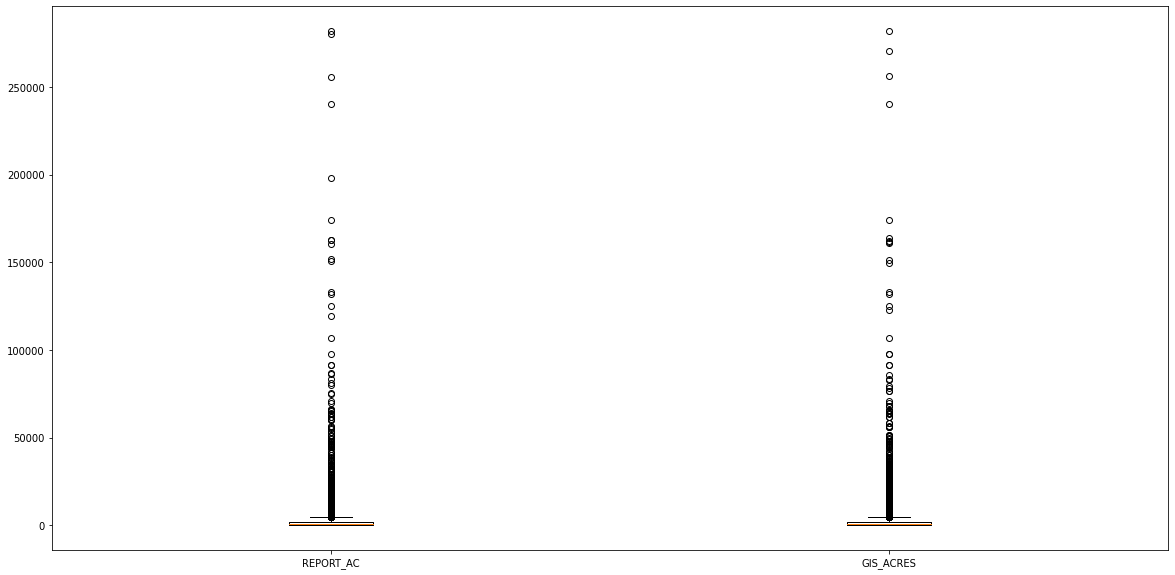

In [ ]:
wildfire_data = wildfire_data[(wildfire_data.REPORT_AC <= 300000)]
wildfire_data = wildfire_data[(wildfire_data.GIS_ACRES <= 300000)]
plt.figure(figsize=(20,10))
plt.boxplot([vals.dropna() for col, vals in wildfire_data[['REPORT_AC', 'GIS_ACRES']].iteritems()]);
plt.xticks([1,2], ['REPORT_AC', 'GIS_ACRES']);

# Conversion to Numbers

In [ ]:
for col in categorical_columns:
    cat_data = wildfire_data[col].astype('category')
    mapping = dict(enumerate(cat_data.cat.categories))
    print(col," : ",mapping,"\n")

STATE  :  {0: 'California', 1: 'Nevada'} 

AGENCY  :  {0: 'Bureau of Land Management', 1: 'California Department of Forestry and Fire Protection', 2: 'Contract County', 3: 'Department of Defense', 4: 'Local Response Area', 5: 'National Park Service', 6: 'Other', 7: 'USDA Forest Service', 8: 'USDI Bureau of Indian Affairs', 9: 'USDI Fish and Wildlife Service'} 

UNIT_ID  :  {0: 'APV', 1: 'Amador - El Dorado CAL FIRE', 2: 'Angeles National Forest', 3: 'Bakersfield District - BLM  (old)', 4: 'Bitter Creek National Wildlife Refuge', 5: 'Butte CAL FIRE', 6: 'CA Desert District - BLM', 7: 'Camp Pendleton Marine Corps Base', 8: 'Carson City District or - BLM', 9: 'City of Weed Vol. Fire Dept.', 10: 'Cleveland National Forest', 11: 'Death Valley NP', 12: 'Eldorado National Forest', 13: 'Fresno-Kings CAL FIRE', 14: 'Hoopa Valley Tribe', 15: 'Humboldt - Del Norte CAL FIRE', 16: 'Inyo National Forest', 17: 'Joshua Tree NP', 18: 'Kern County', 19: 'Kern National Wildlife Refuge', 20: 'Klamath Nati

In [ ]:
for col in categorical_columns:
    wildfire_data[col] = wildfire_data[col].astype('category').cat.codes
wildfire_data

,YEAR,STATE,AGENCY,UNIT_ID,CAUSE,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,DURATION
1251,1921.0,0,5,52,12,1600.0,1551.4670,7,1,12.0
1340,1922.0,0,5,52,0,350.0,535.8748,7,1,4.0
1341,1922.0,0,5,52,12,550.0,667.1011,7,1,4.0
1342,1922.0,0,5,52,12,300.0,449.5453,7,1,2.0
1814,1926.0,0,5,52,15,86000.0,34357.7000,5,1,9.0
...,...,...,...,...,...,...,...,...,...,...
173,2017.0,0,1,36,5,9989.0,16140.8000,6,1,18.0
174,2017.0,0,5,68,0,0.0,8577.5520,6,1,119.0
175,2017.0,0,2,26,5,7194.0,7051.3510,7,1,7.0
176,2017.0,0,7,33,0,7692.0,7693.3190,2,1,12.0


In [ ]:
wildfire_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2937 entries, 1251 to 177
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YEAR       2937 non-null   float64
 1   STATE      2937 non-null   int8   
 2   AGENCY     2937 non-null   int8   
 3   UNIT_ID    2937 non-null   int8   
 4   CAUSE      2937 non-null   int8   
 5   REPORT_AC  2937 non-null   float64
 6   GIS_ACRES  2937 non-null   float64
 7   C_METHOD   2937 non-null   int8   
 8   OBJECTIVE  2937 non-null   int8   
 9   DURATION   2937 non-null   float64
dtypes: float64(4), int8(6)
memory usage: 131.9 KB


# Number of Data Samples

In [ ]:
print("Number of data samples: ", len(wildfire_data))

Number of data samples:  2937


# Number of features

In [ ]:
print("Number of features: ", len(wildfire_data.columns))

Number of features:  10


# Number of Classes

In [ ]:
# Unique values in OBJECTIVE Column
wildfire_data.OBJECTIVE.unique()

array([1, 0], dtype=int8)

# Number of Data Samples per Class

In [ ]:
wildfire_data['OBJECTIVE'].value_counts()

1    2805
0     132
Name: OBJECTIVE, dtype: int64

# Data Exploration

### Relationship between Size of fire and duration

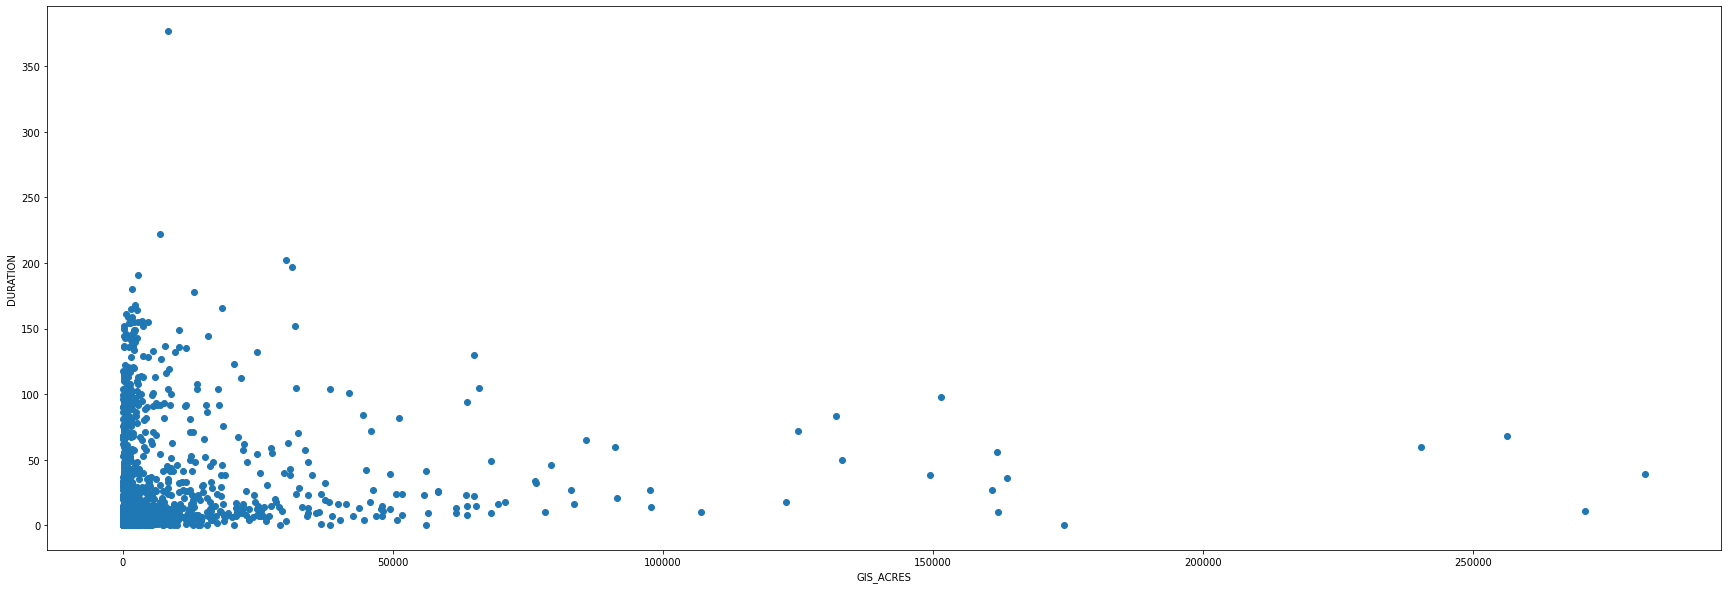

In [ ]:
plt.figure(figsize=(30,10))
plt.scatter(wildfire_data.GIS_ACRES, wildfire_data.DURATION)
plt.xlabel('GIS_ACRES'); plt.ylabel('DURATION')
plt.show()

From the above plot we can see that there is not much correlation between the size of the fire and the duration for which fire lasted.

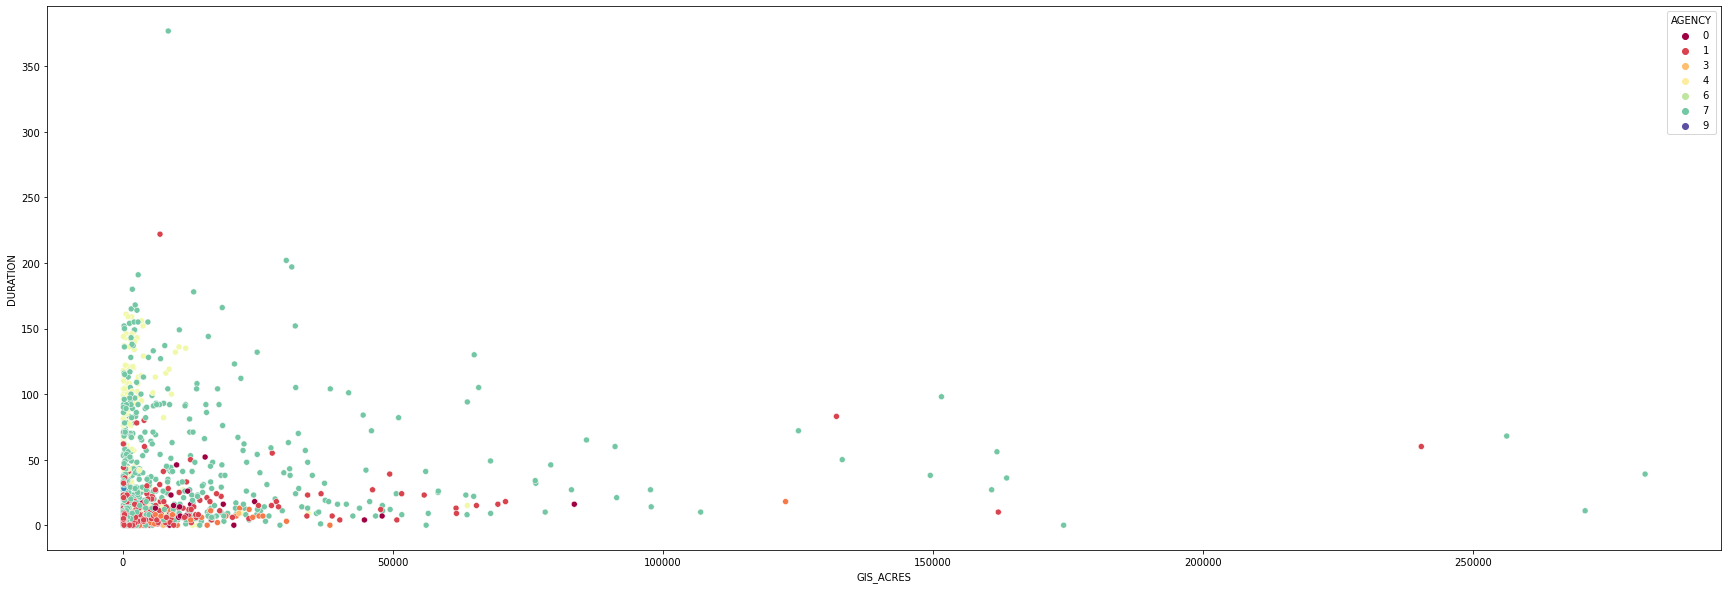

In [ ]:
plt.figure(figsize=(30,10))
# make a scatterplot of DURATION vs GIS_ACRES, and color each point by AGENCY
sns.scatterplot(data=wildfire_data, x='GIS_ACRES', y='DURATION', hue='AGENCY', palette='Spectral')
plt.show()

The above plot with hues corresponding to the AGENCY that dealt with the fire suggests that the lack of correlation is due to the different policies and management at the different agencies.

### Wildfire Incidents Handled based on Agency

In [ ]:
admin_indx = wildfire_data["AGENCY"].value_counts().index

admin_count = wildfire_data["AGENCY"].value_counts().values
admin_count

array([1386,  809,  262,  220,  207,   23,   22,    4,    3,    1])

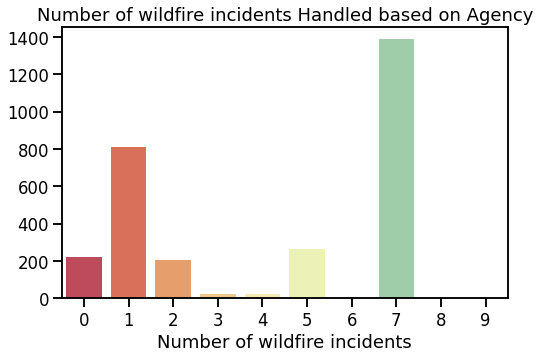

In [ ]:
plt.figure(figsize=(8,5))
sns.set_context("talk")
sns.barplot(x = admin_indx, y=admin_count, palette  = "Spectral");
plt.xticks(rotation = 0);
plt.title('Number of wildfire incidents Handled based on Agency')
plt.xlabel('Number of wildfire incidents')
plt.show()

### Fire Behaviour over the Years

In [ ]:
wildfire_data_by_year = wildfire_data.groupby('YEAR').mean().reset_index()
wildfire_data_by_year

,YEAR,STATE,AGENCY,UNIT_ID,CAUSE,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,DURATION
0,1921.0,0.000000,5.000000,52.000000,12.000000,1600.000000,1551.467000,7.000000,1.0,12.000000
1,1922.0,0.000000,5.000000,52.000000,8.000000,400.000000,550.840400,7.000000,1.0,3.333333
2,1926.0,0.000000,5.000000,52.000000,13.000000,43250.000000,17619.385950,6.000000,1.0,7.500000
3,1928.0,0.000000,5.000000,52.000000,5.000000,15500.000000,21997.880000,7.000000,1.0,9.000000
4,1930.0,0.000000,5.000000,52.000000,9.000000,1125.000000,603.348500,7.000000,1.0,0.500000
...,...,...,...,...,...,...,...,...,...,...
81,2014.0,0.037037,4.629630,29.555556,5.888889,9210.018315,8898.781669,2.574074,1.0,17.777778
82,2015.0,0.000000,4.377778,45.444444,4.944444,6836.888111,7410.150818,2.222222,1.0,31.544444
83,2016.0,0.000000,3.178947,32.200000,8.463158,5052.302292,5078.488127,1.905263,1.0,19.378947
84,2017.0,0.000000,3.626761,42.091549,5.035211,6673.185021,8292.380089,2.626761,1.0,25.971831


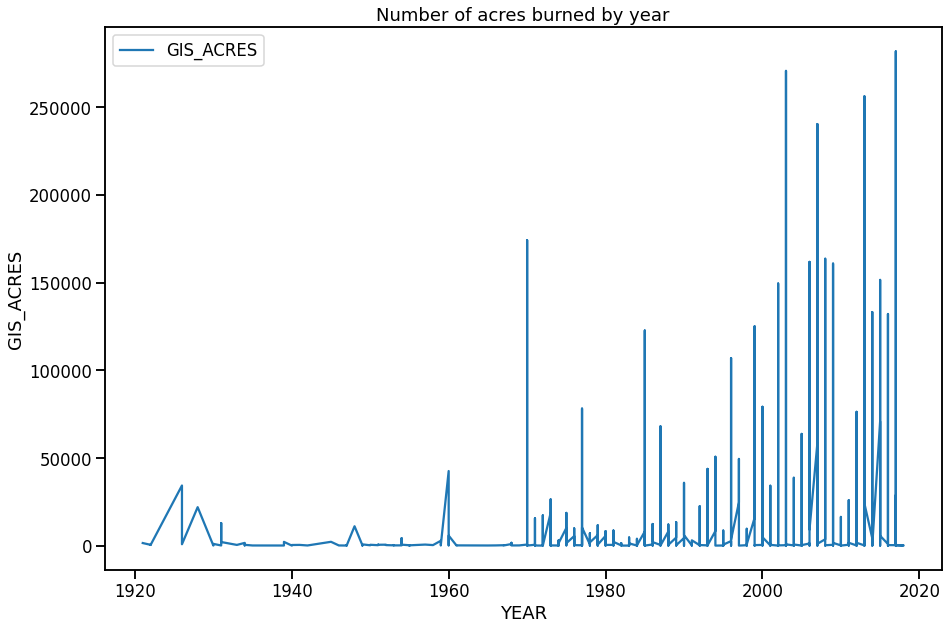

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(wildfire_data['YEAR'], wildfire_data['GIS_ACRES'], label = "GIS_ACRES")
# plt.plot(wildfire_data['YEAR'], wildfire_data['DURATION'], label = "DURATION")
plt.legend()
plt.title("Number of acres burned by year")
plt.xlabel('YEAR')
plt.ylabel('GIS_ACRES')
plt.show()

From the above plot we can see that the number of acres burned is increasing with year

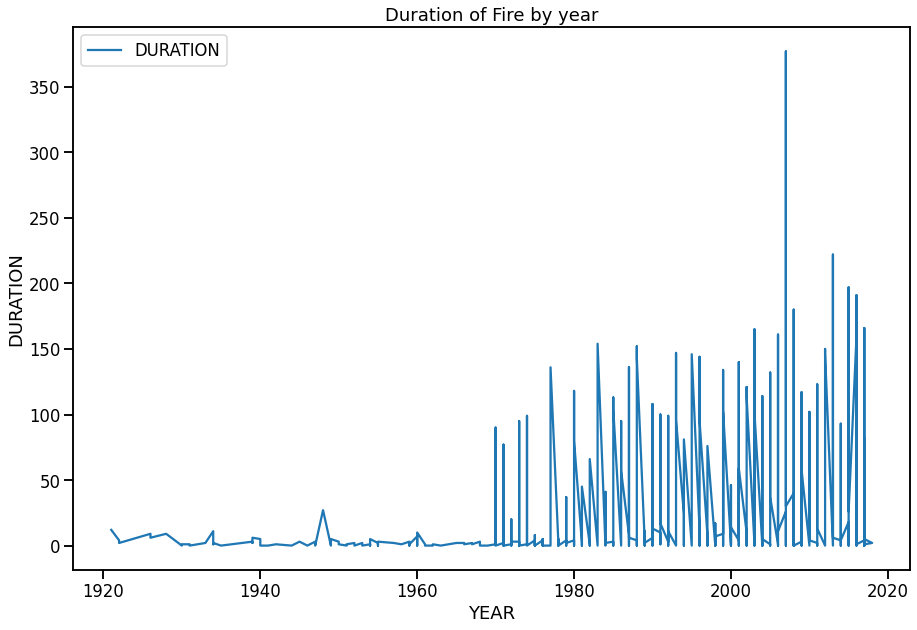

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(wildfire_data['YEAR'], wildfire_data['DURATION'], label = "DURATION")
plt.legend()
plt.title("Duration of Fire by year")
plt.xlabel('YEAR')
plt.ylabel('DURATION')
plt.show()

From the above plot we can see that the duration of fire is increasing with year.

## Scatterplot Matrix

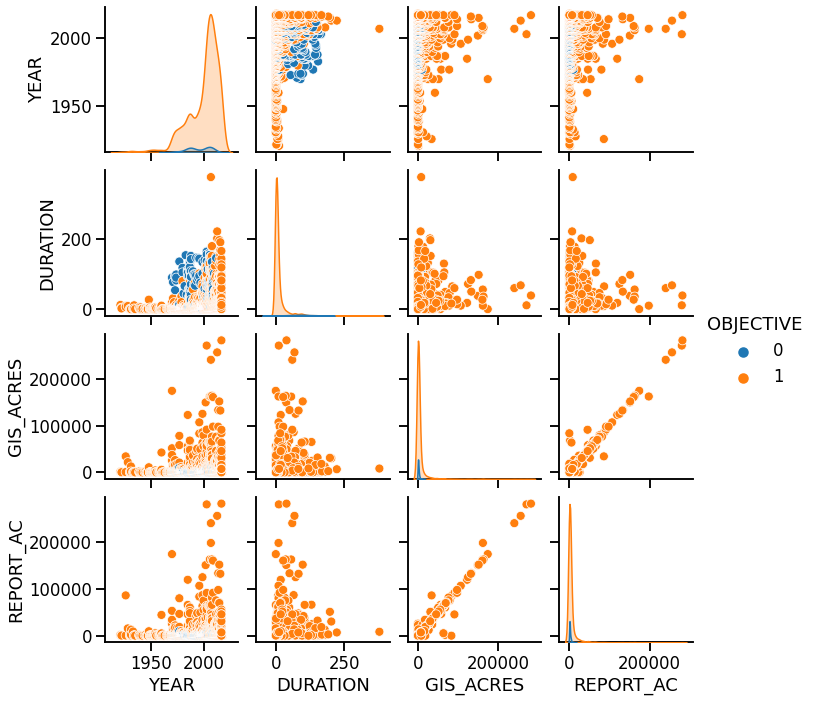

In [ ]:
sns.pairplot(wildfire_data.loc[:, ['YEAR','DURATION', 'GIS_ACRES', 'REPORT_AC', 'OBJECTIVE']], hue="OBJECTIVE")
plt.show()

The above plot shows the relationship between various features.

We can see that with increasing years, the amount of acres burned and reported is increasing so is the duration of the fire.

The GIS_ACRES and REPORT_AC have a linear relation among them.

## Residual Plot

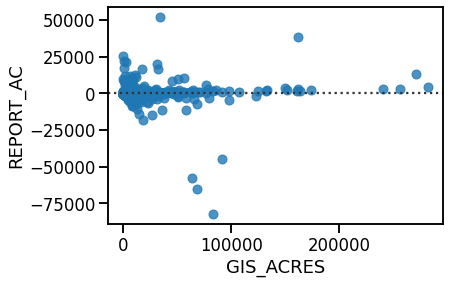

In [ ]:
sns.residplot(x = "GIS_ACRES", y = "REPORT_AC", data = wildfire_data)
plt.show()

The points at distance from the x-axis represent the outliers in the above residual plot